In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.style as style
style.use('fivethirtyeight')
import helper 

# Makes figures a higher resolution. Better for saving.
plt.rcParams['figure.dpi'] = 300
plt.rcParams['savefig.dpi'] = 300

In [2]:
colors = ["#FF0B04", "#F1BE48",
           "#B9975B", "#8B5B29",
           "#524727",
         ]
sns.set_palette(sns.color_palette(colors))

In [3]:
# importing data
housing = pd.read_csv('Ames_Housing_Price_Data.csv', index_col=0,low_memory = False)

# # school information
# schools = pd.read_csv('schoolFeatures.csv',index_col = 0)

# data processing
train, test = helper.data_processing_wrapper(housing,
                                               num_to_cat_list = ['MSSubClass','MoSold'],
                                             remove_PID = False
                                        )

housing_no_geo = pd.concat([train,test],axis=0)

# this is where julie needs to help me find that geo impute function :) *fingers crossed~

In [4]:
# importing latlong data
latlong = pd.read_csv('ames_housing_latlong.csv', index_col=0)
latlong_keep = [
    'PID',
    'latitude',
    'longitude'
]
latlong = latlong[latlong_keep]

# merge school feature onto original data set.
housing = housing_no_geo.merge(latlong, how = 'left', left_on = 'PID', right_on = 'PID')
########################
# this is where using that imputed geo file would be good but don't have that for now
########################
housing = housing.dropna(subset=['latitude'])

housing = pd.read_csv('ames_housing_latlong.csv', index_col=0)
loca = housing[(housing['latitude']>=41.9)&(housing['longitude']<=-93.59)]

In [5]:
# import matplotlib.image as image
# im = image.imread('Iowa_State_Cyclones_logo.png')


<ipython-input-6-a3f9128f7232>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['SalePrice_bins'] = pd.qcut(graph_df['SalePrice'],
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/seaborn/utils.py:413: UserWarning: You have mixed positional and keyword arguments, some input may be discarded.
  new_legend = legend_func(handles, labels, loc

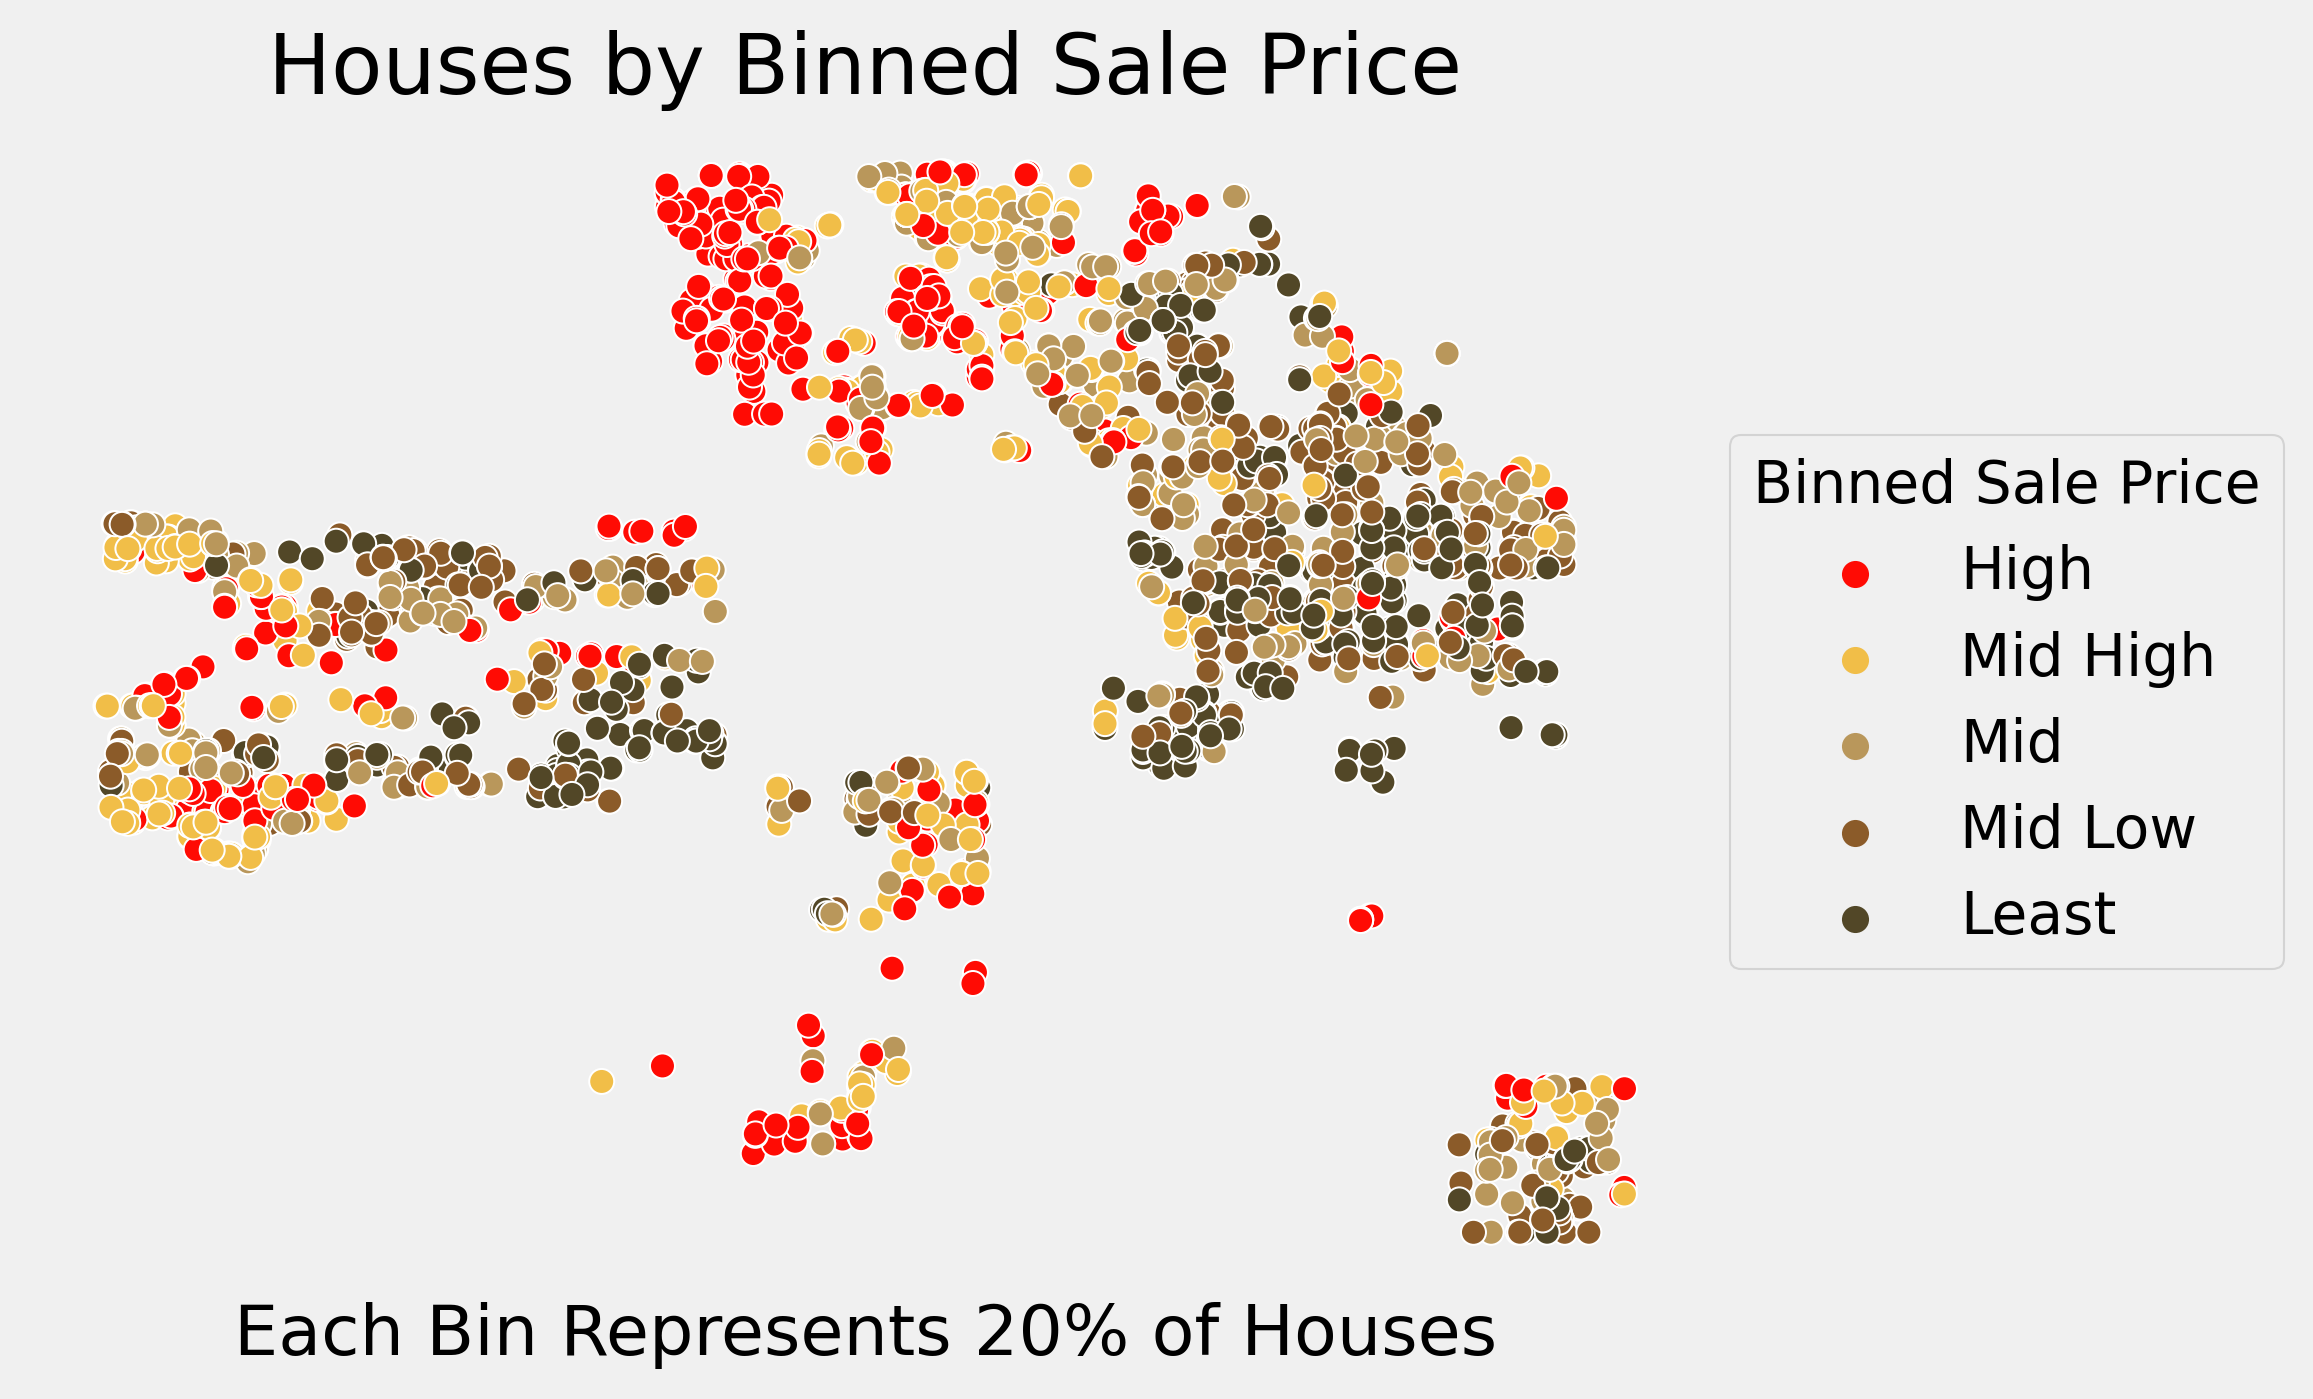

In [6]:
graph_df = loca
graph_df['SalePrice_bins'] = pd.qcut(graph_df['SalePrice'],
                              q=5)
graph_df.SalePrice_bins = graph_df.SalePrice_bins.astype(str)

hue_order = ['(225000.0, 755000.0]', 
             '(177000.0, 225000.0]',
             '(146240.0, 177000.0]',
             '(125000.0, 146240.0]', 
             '(12788.999, 125000.0]']
g = sns.scatterplot(data = graph_df, y = 'latitude',x = 'longitude',
                    hue='SalePrice_bins',hue_order = hue_order,
                    palette = colors)
plt.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False,labelsize=16)
plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='Each Bin Represents 20% of Houses', ylabel='',title='Houses by Binned Sale Price')
g.grid(False)



handles, labels = g.get_legend_handles_labels()
labels=['High',
        'Mid High',
        'Mid',
        'Mid Low',
        'Least']
# labels, handles = zip(labels, handles)
sns.move_legend(g,loc = "center left",bbox_to_anchor=(1, .5),
                labels=labels, handles = handles, title = 'Binned Sale Price',
#                 frameon=False
               )
# sns.move_legend(g,loc = "center",bbox_to_anchor=(.5, 1.1),ncol=3,
#                 labels=labels, handles = handles, title = 'Binned Sale Price',
#                 frameon=False
#                )

plt.show()

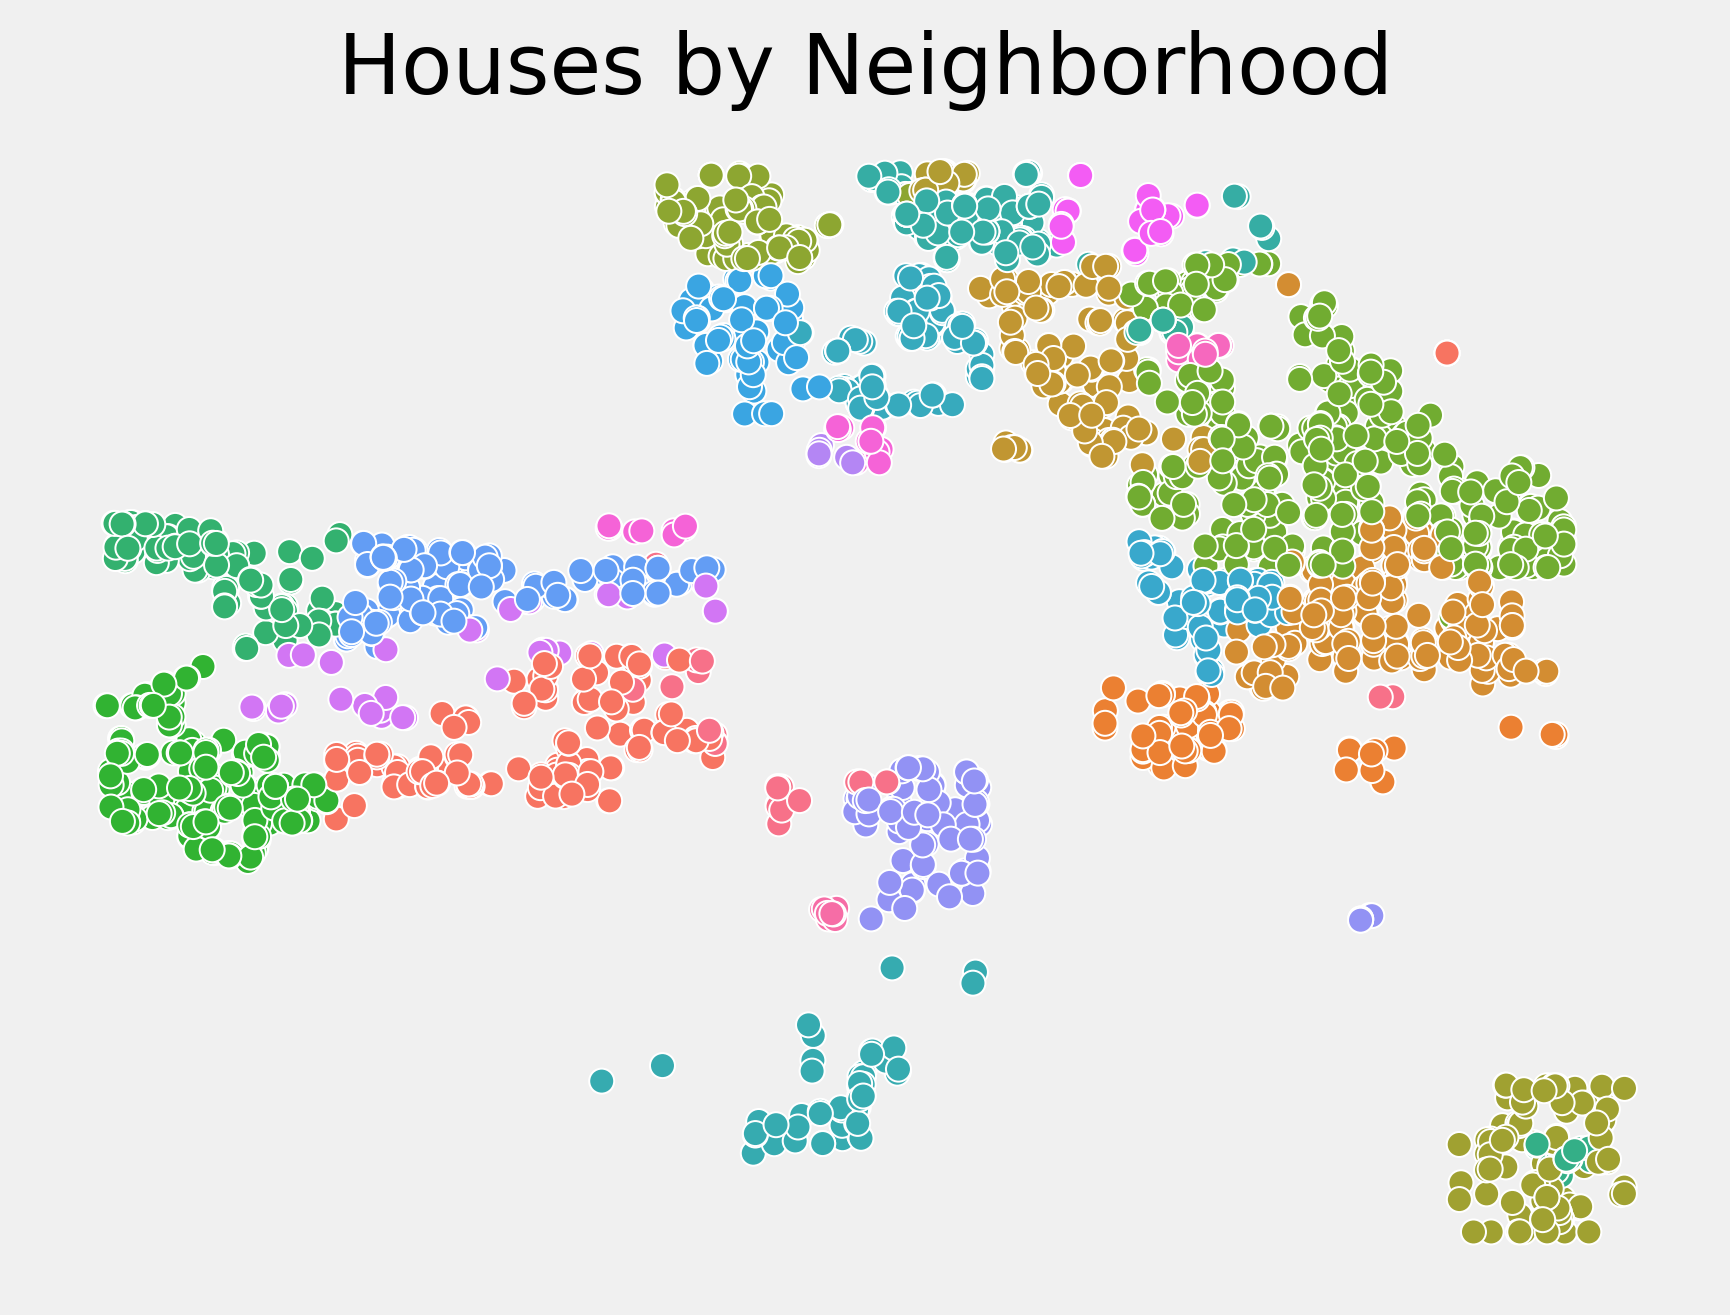

In [7]:
g = sns.scatterplot(data = loca, y = 'latitude',x = 'longitude',hue='Neighborhood',
                   legend=False)
plt.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False,labelsize=16)
plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='', ylabel='',title='Houses by Neighborhood')
g.grid(False)

plt.show()

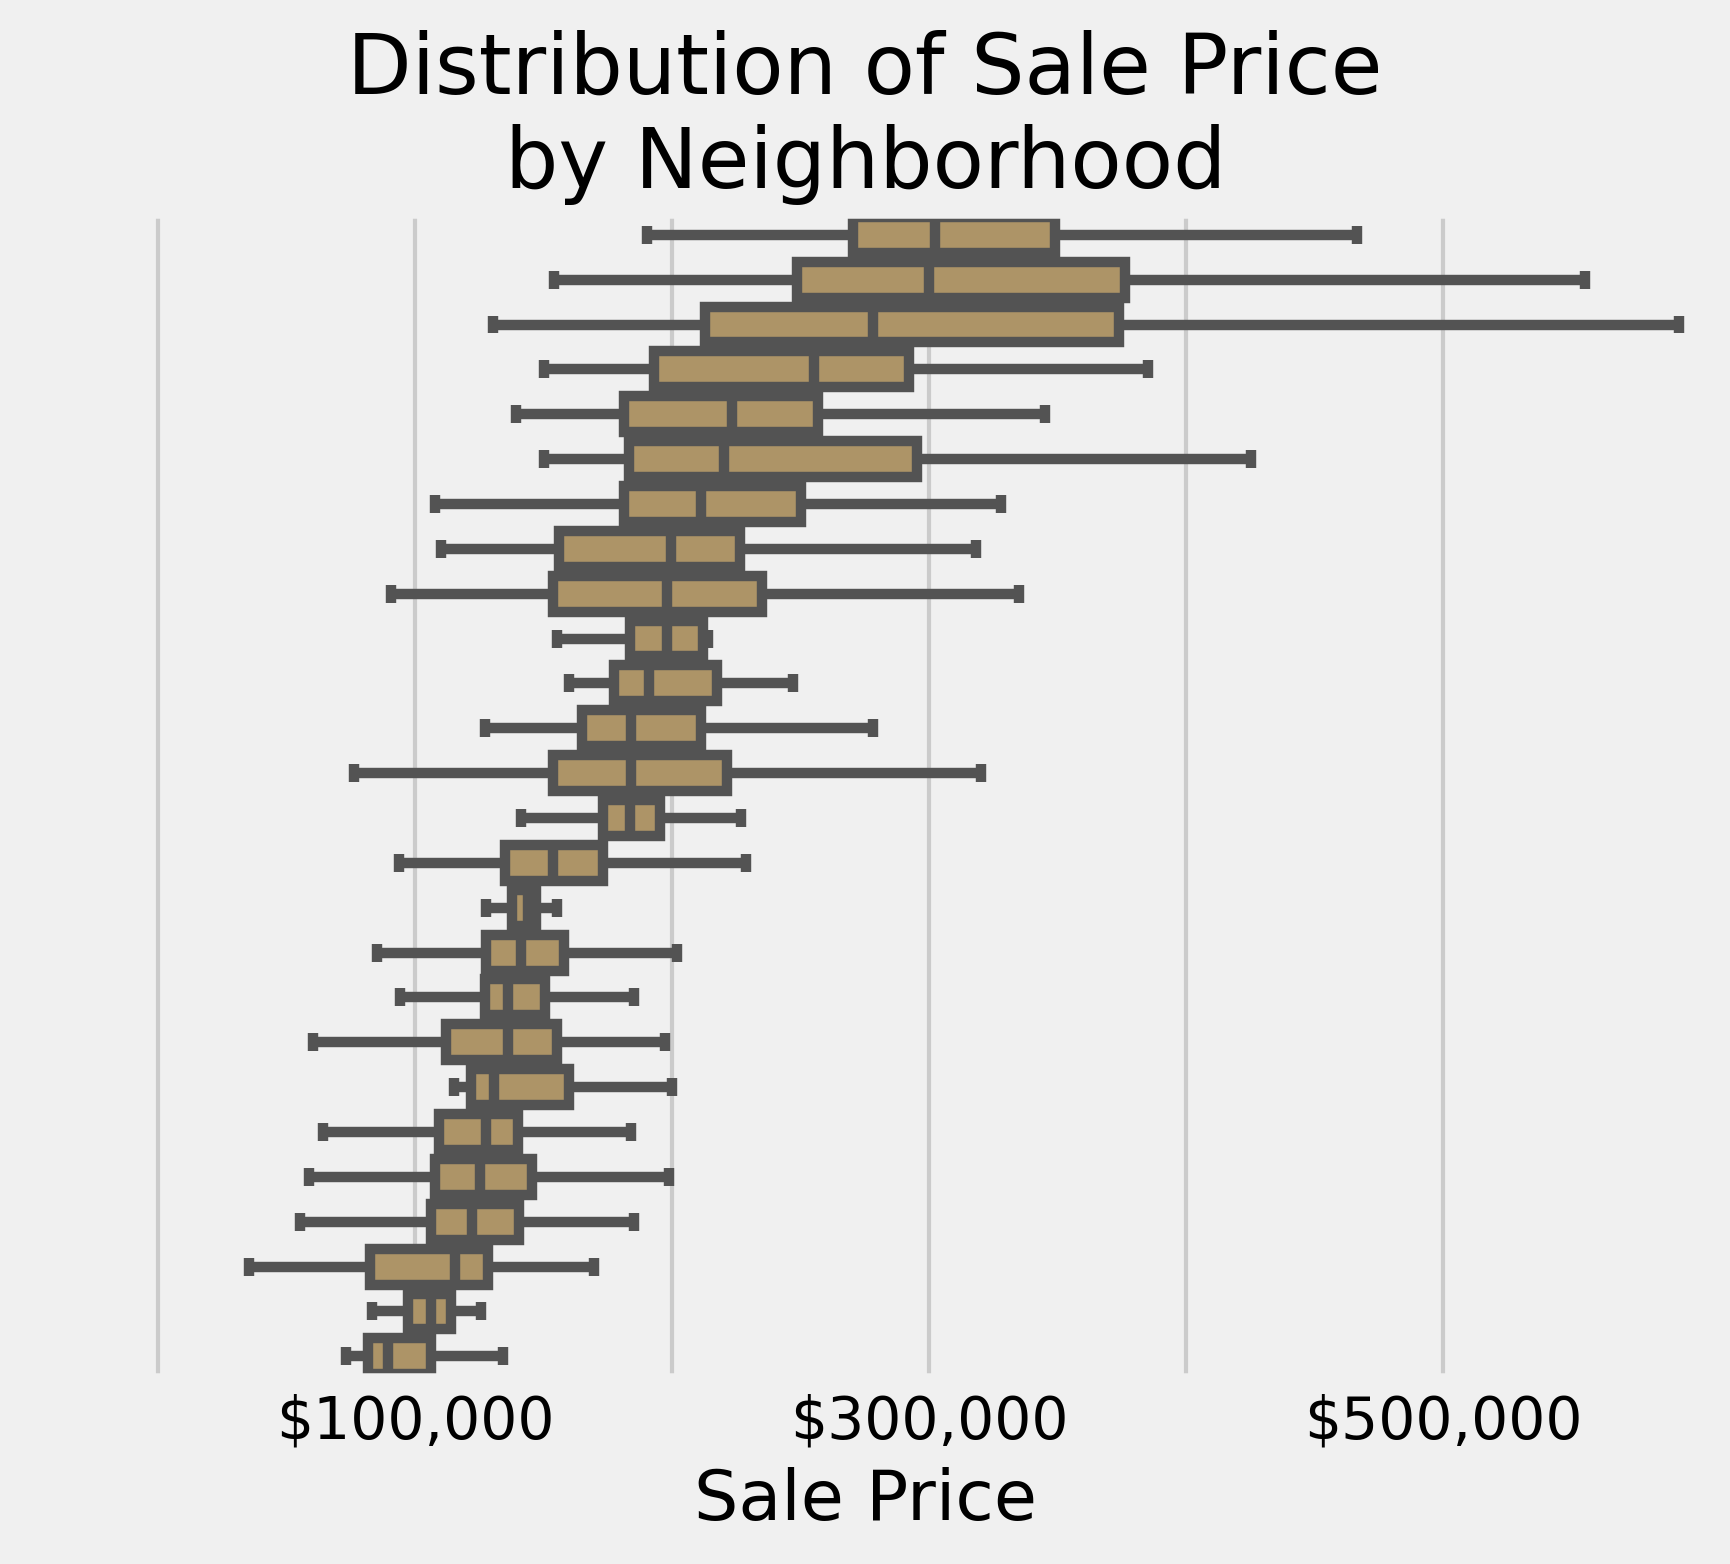

In [8]:
ordering = loca.groupby('Neighborhood').agg({'SalePrice':'median'}).sort_values('SalePrice',ascending=False).index

fig, ax = plt.subplots()
g = sns.boxplot(data=loca,x='SalePrice',y='Neighborhood',
                order = ordering,
                ax=ax,
                color = colors[2],
                linewidth=2.5,
                showfliers=False
               )
# plt.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False,labelsize=16)
plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='Sale Price', ylabel='',title='Distribution of Sale Price\nby Neighborhood')

# for label in ax.xaxis.get_ticklabels()[0::2]:
#     label.set_visible(False)
g.set(xlim=(-50000,600000))


g.set(xticks=[0,100000,200000,300000,400000,500000])
g.set_xticklabels(labels = ['','$100,000','','$300,000','','$500,000'])
plt.show()


In [9]:
loca.groupby('Neighborhood').agg({'SalePrice':'median'}).sort_values('SalePrice',ascending=False).index

Index(['NoRidge', 'NridgHt', 'StoneBr', 'Veenker', 'Somerst', 'Timber',
       'ClearCr', 'CollgCr', 'Crawfor', 'Greens', 'Blmngtn', 'NWAmes',
       'SawyerW', 'Gilbert', 'Mitchel', 'NPkVill', 'NAmes', 'Sawyer', 'SWISU',
       'Blueste', 'BrkSide', 'Edwards', 'OldTown', 'IDOTRR', 'BrDale',
       'MeadowV'],
      dtype='object', name='Neighborhood')

In [10]:
nbhd_cluster_map = {'Blmngtn': 0,
                     'Blueste': 1,
                     'BrDale': 1,
                     'BrkSide': 1,
                     'ClearCr': 0,
                     'CollgCr': 0,
                     'Crawfor': 0,
                     'Edwards': 1,
                     'Gilbert': 0,
                     'Greens': 1,
                     'GrnHill': 0,
                     'IDOTRR': 1,
                     'Landmrk': 1,
                     'MeadowV': 1,
                     'Mitchel': 1,
                     'NAmes': 1,
                     'NPkVill': 1,
                     'NWAmes': 0,
                     'NoRidge': 0,
                     'NridgHt': 0,
                     'OldTown': 1,
                     'SWISU': 1,
                     'Sawyer': 1,
                     'SawyerW': 0,
                     'Somerst': 0,
                     'StoneBr': 0,
                     'Timber': 0,
                     'Veenker': 0}

<ipython-input-11-23ef8c0858f1>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  loca['NhdCluster'] = loca.apply(lambda x: nbhd_cluster_map[x['Neighborhood']], axis=1)


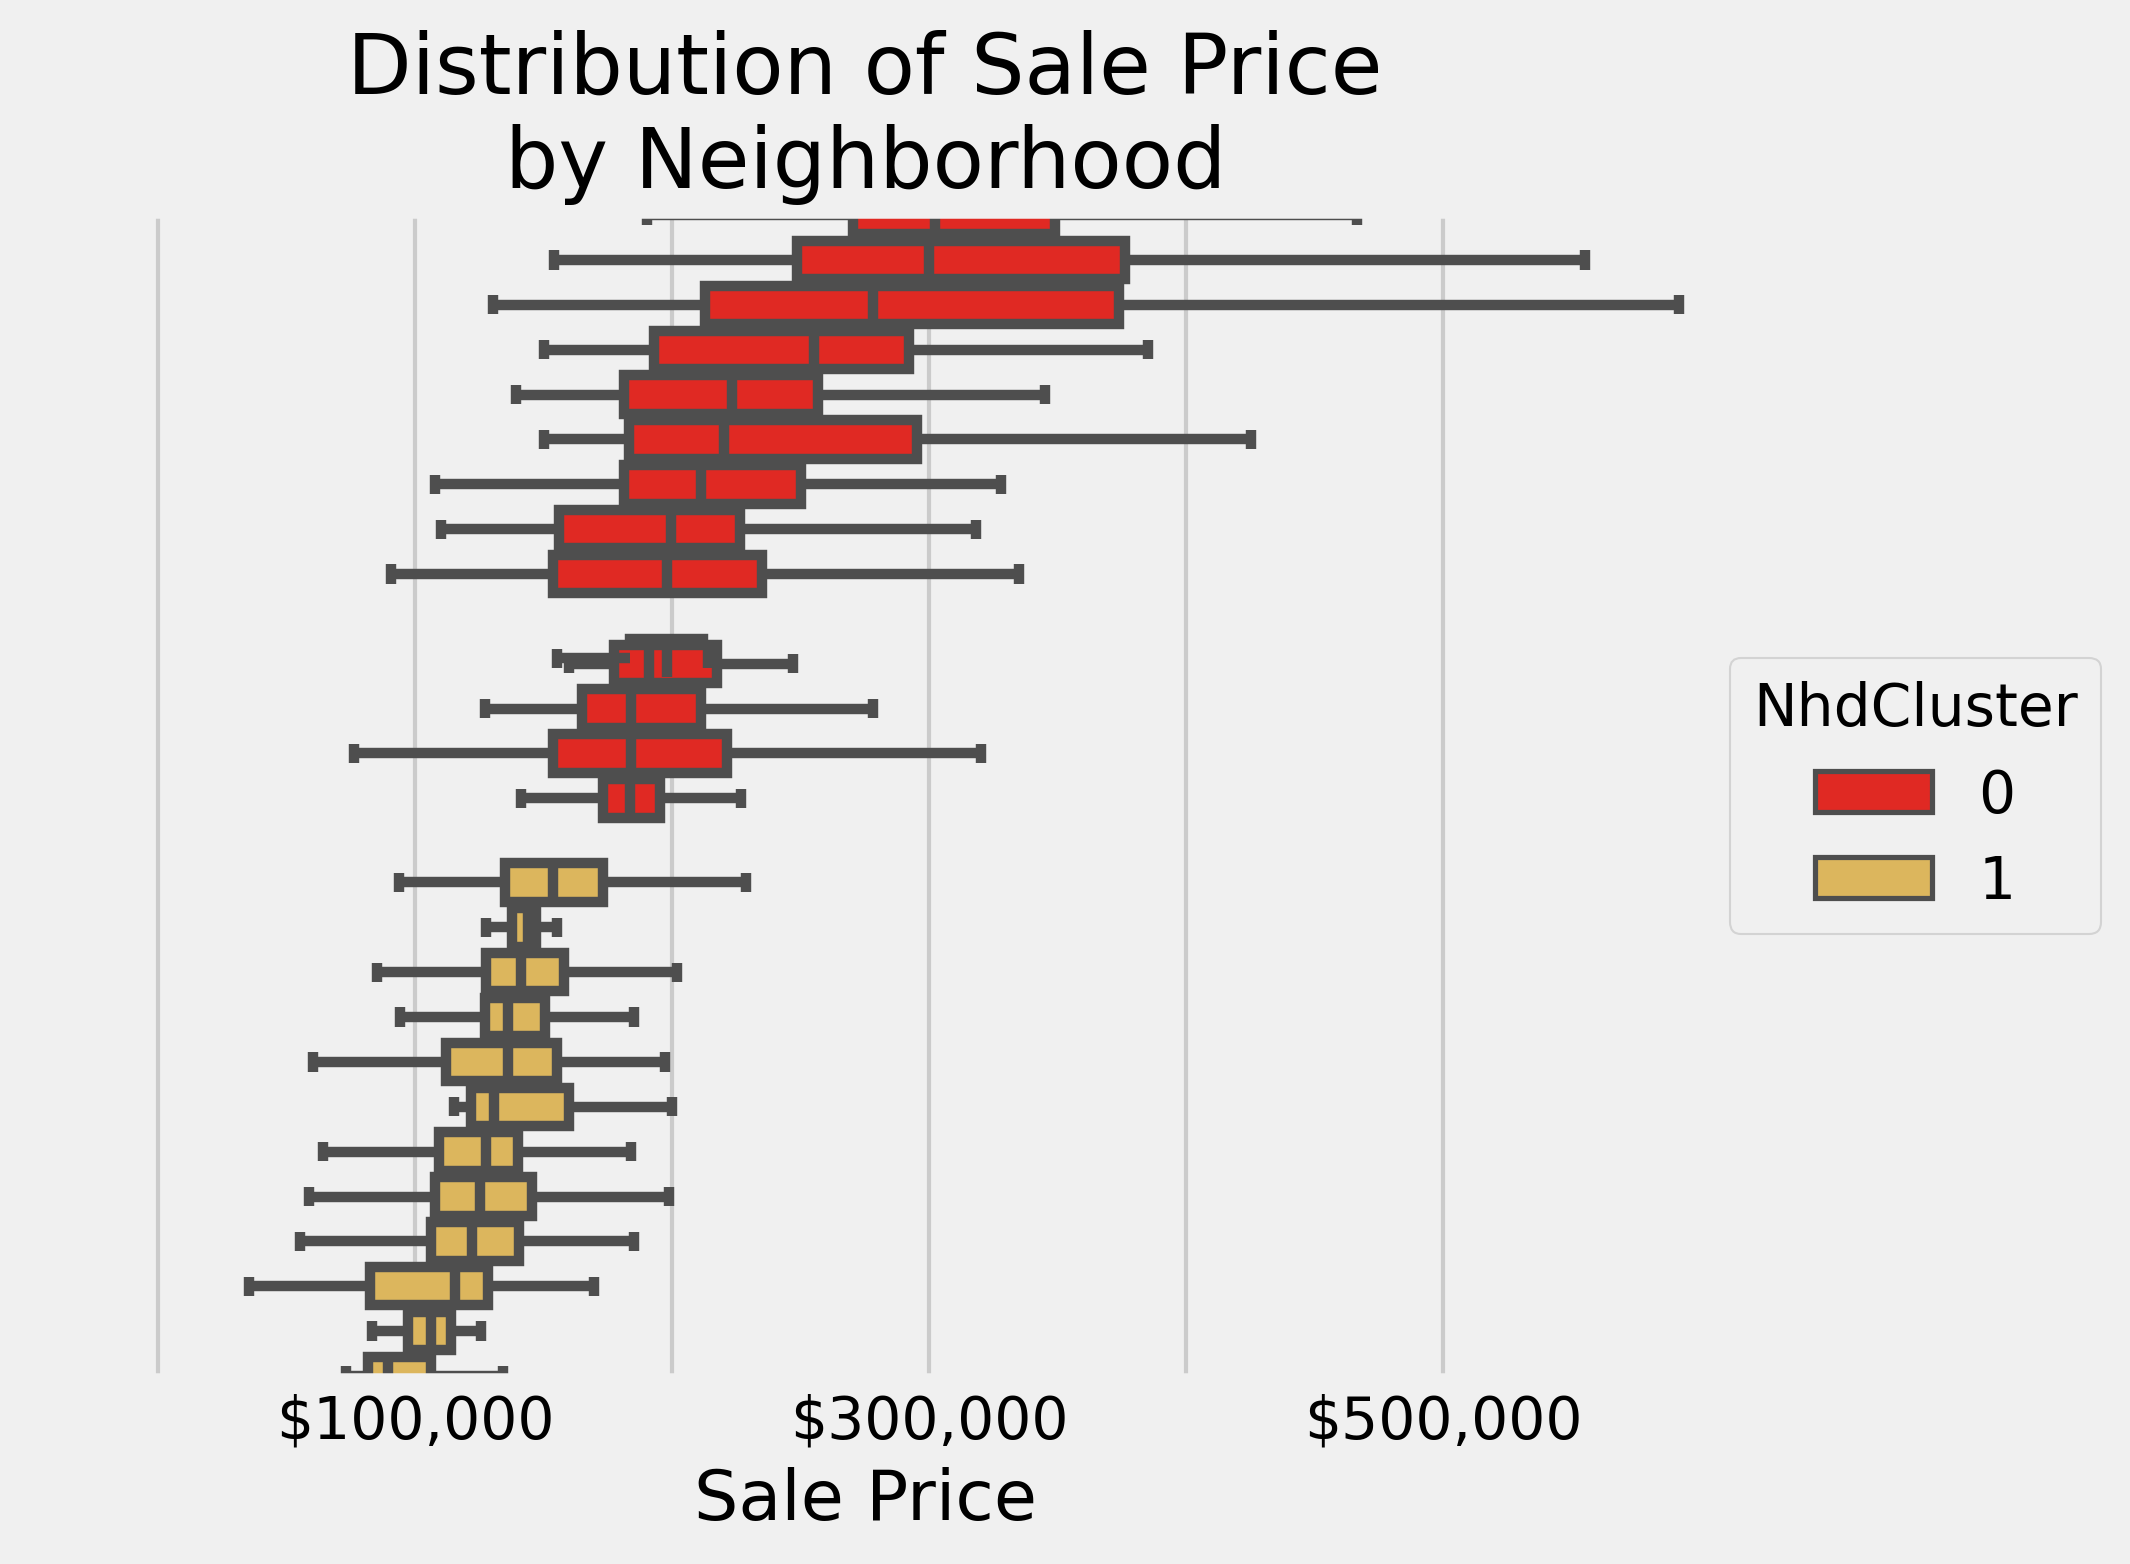

In [11]:
loca['NhdCluster'] = loca.apply(lambda x: nbhd_cluster_map[x['Neighborhood']], axis=1)


ordering = loca.groupby('Neighborhood').agg({'SalePrice':'median'}).sort_values('SalePrice',ascending=False).index

fig, ax = plt.subplots()
g = sns.boxplot(data=loca,x='SalePrice',y='Neighborhood', 
                hue = 'NhdCluster', 
                width=1.75,
                order = ordering,
                ax=ax,
                palette = colors,
                linewidth=2.5,
                showfliers=False,
               )

sns.move_legend(g,loc = "center left",bbox_to_anchor=(1, .5),
#                 frameon=False
               )
# plt.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False,labelsize=16)
plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='Sale Price', ylabel='',title='Distribution of Sale Price\nby Neighborhood')


g.set(xlim=(-50000,600000))
# g.set(ylim=(-0.1,20))


g.set(xticks=[0,100000,200000,300000,400000,500000])
g.set_xticklabels(labels = ['','$100,000','','$300,000','','$500,000'])
plt.show()

In [12]:
loca.SalePrice.isna().sum()

0

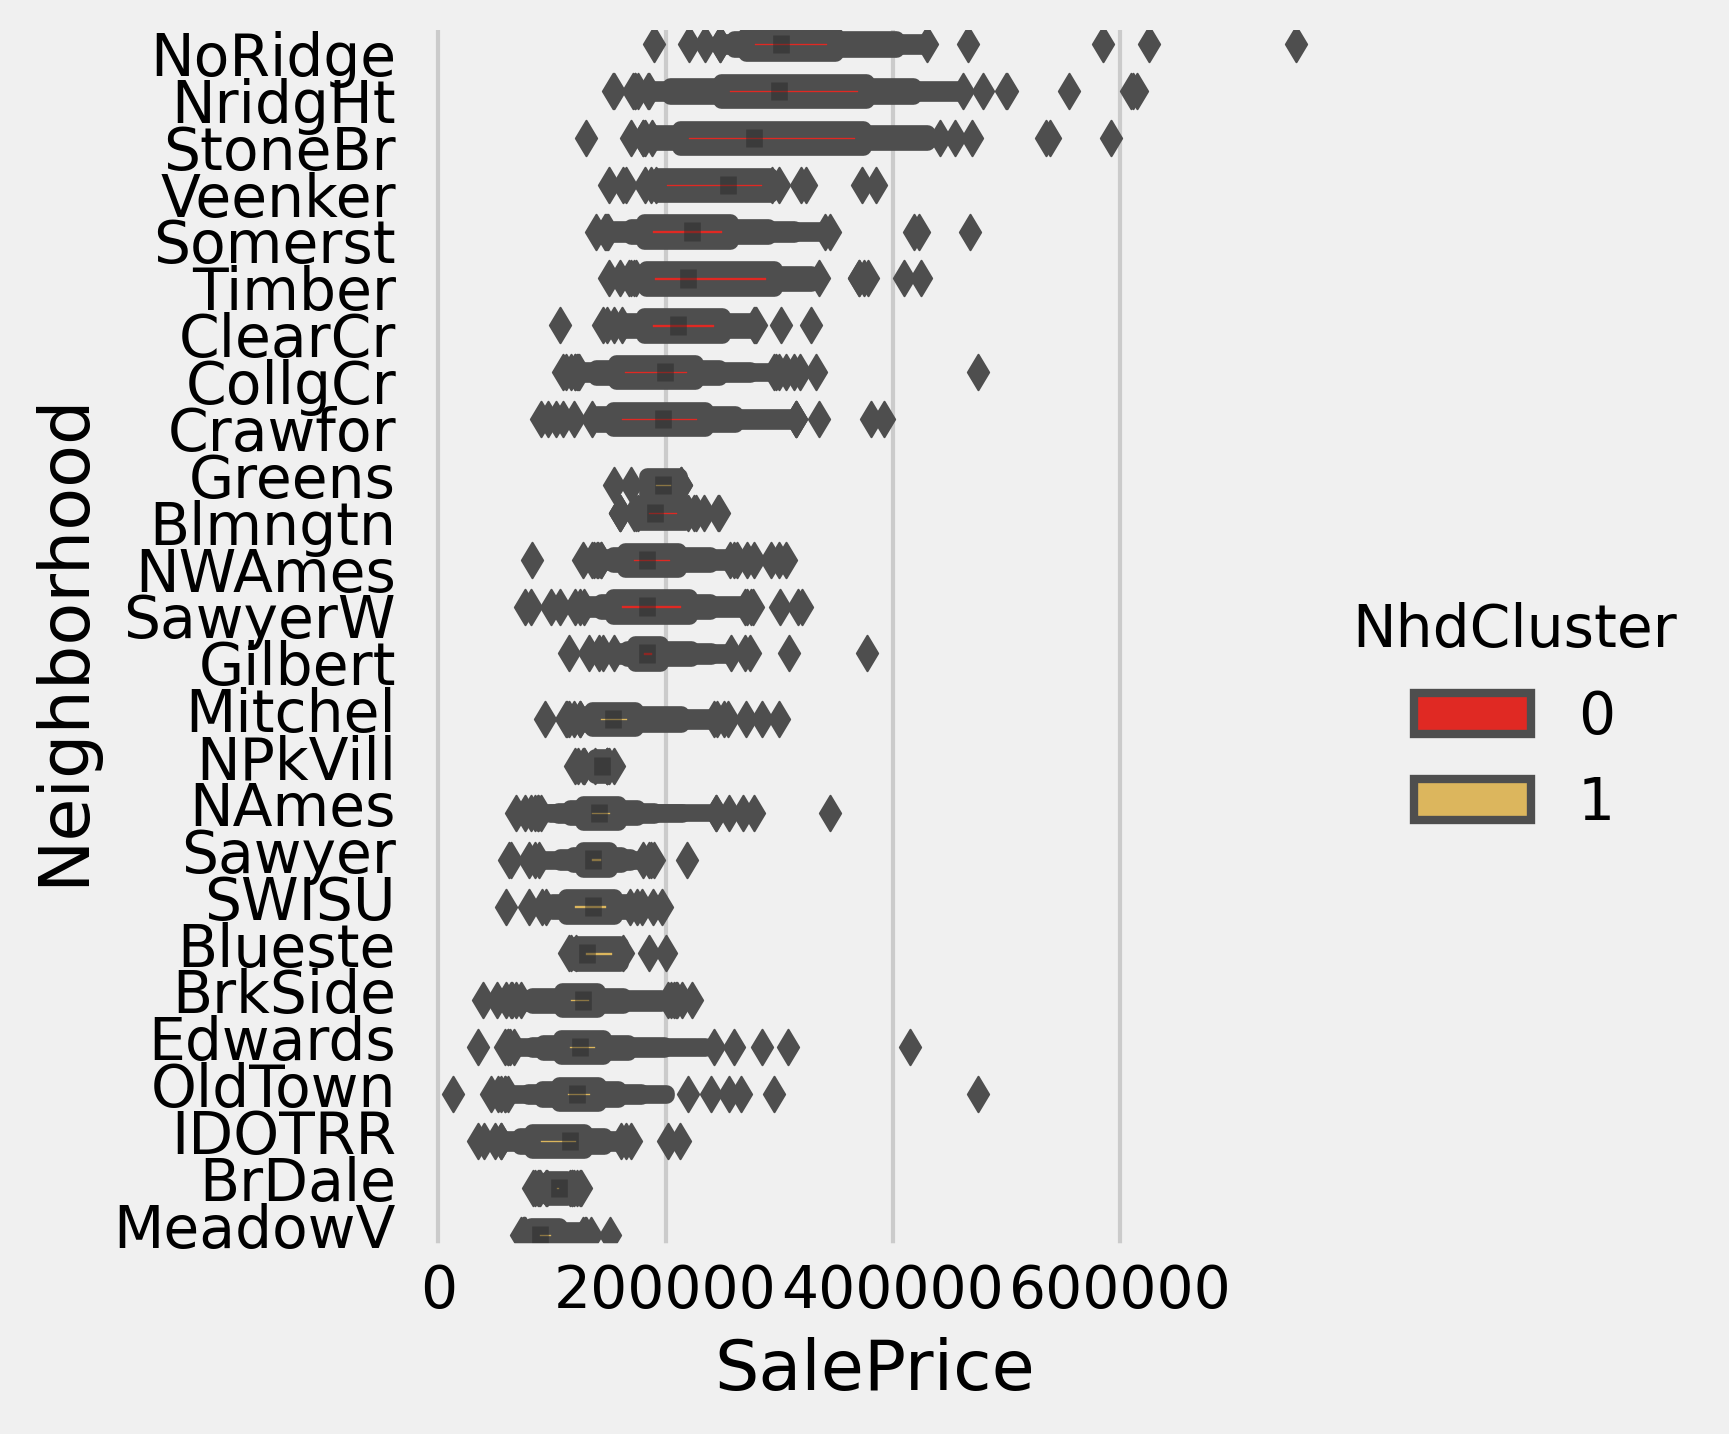

In [13]:
g = sns.catplot(data=loca,x='SalePrice',y='Neighborhood', 
                hue = 'NhdCluster', 
                order = ordering,
                kind='boxen'
               )
plt.show()

In [14]:
ordering

Index(['NoRidge', 'NridgHt', 'StoneBr', 'Veenker', 'Somerst', 'Timber',
       'ClearCr', 'CollgCr', 'Crawfor', 'Greens', 'Blmngtn', 'NWAmes',
       'SawyerW', 'Gilbert', 'Mitchel', 'NPkVill', 'NAmes', 'Sawyer', 'SWISU',
       'Blueste', 'BrkSide', 'Edwards', 'OldTown', 'IDOTRR', 'BrDale',
       'MeadowV'],
      dtype='object', name='Neighborhood')

<ipython-input-15-424b2d80d21e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  graph_df['SalePrice_bins'] = pd.qcut(graph_df['SalePrice'],
/Users/haydenlw4/opt/anaconda3/lib/python3.8/site-packages/pandas/core/generic.py:5507: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


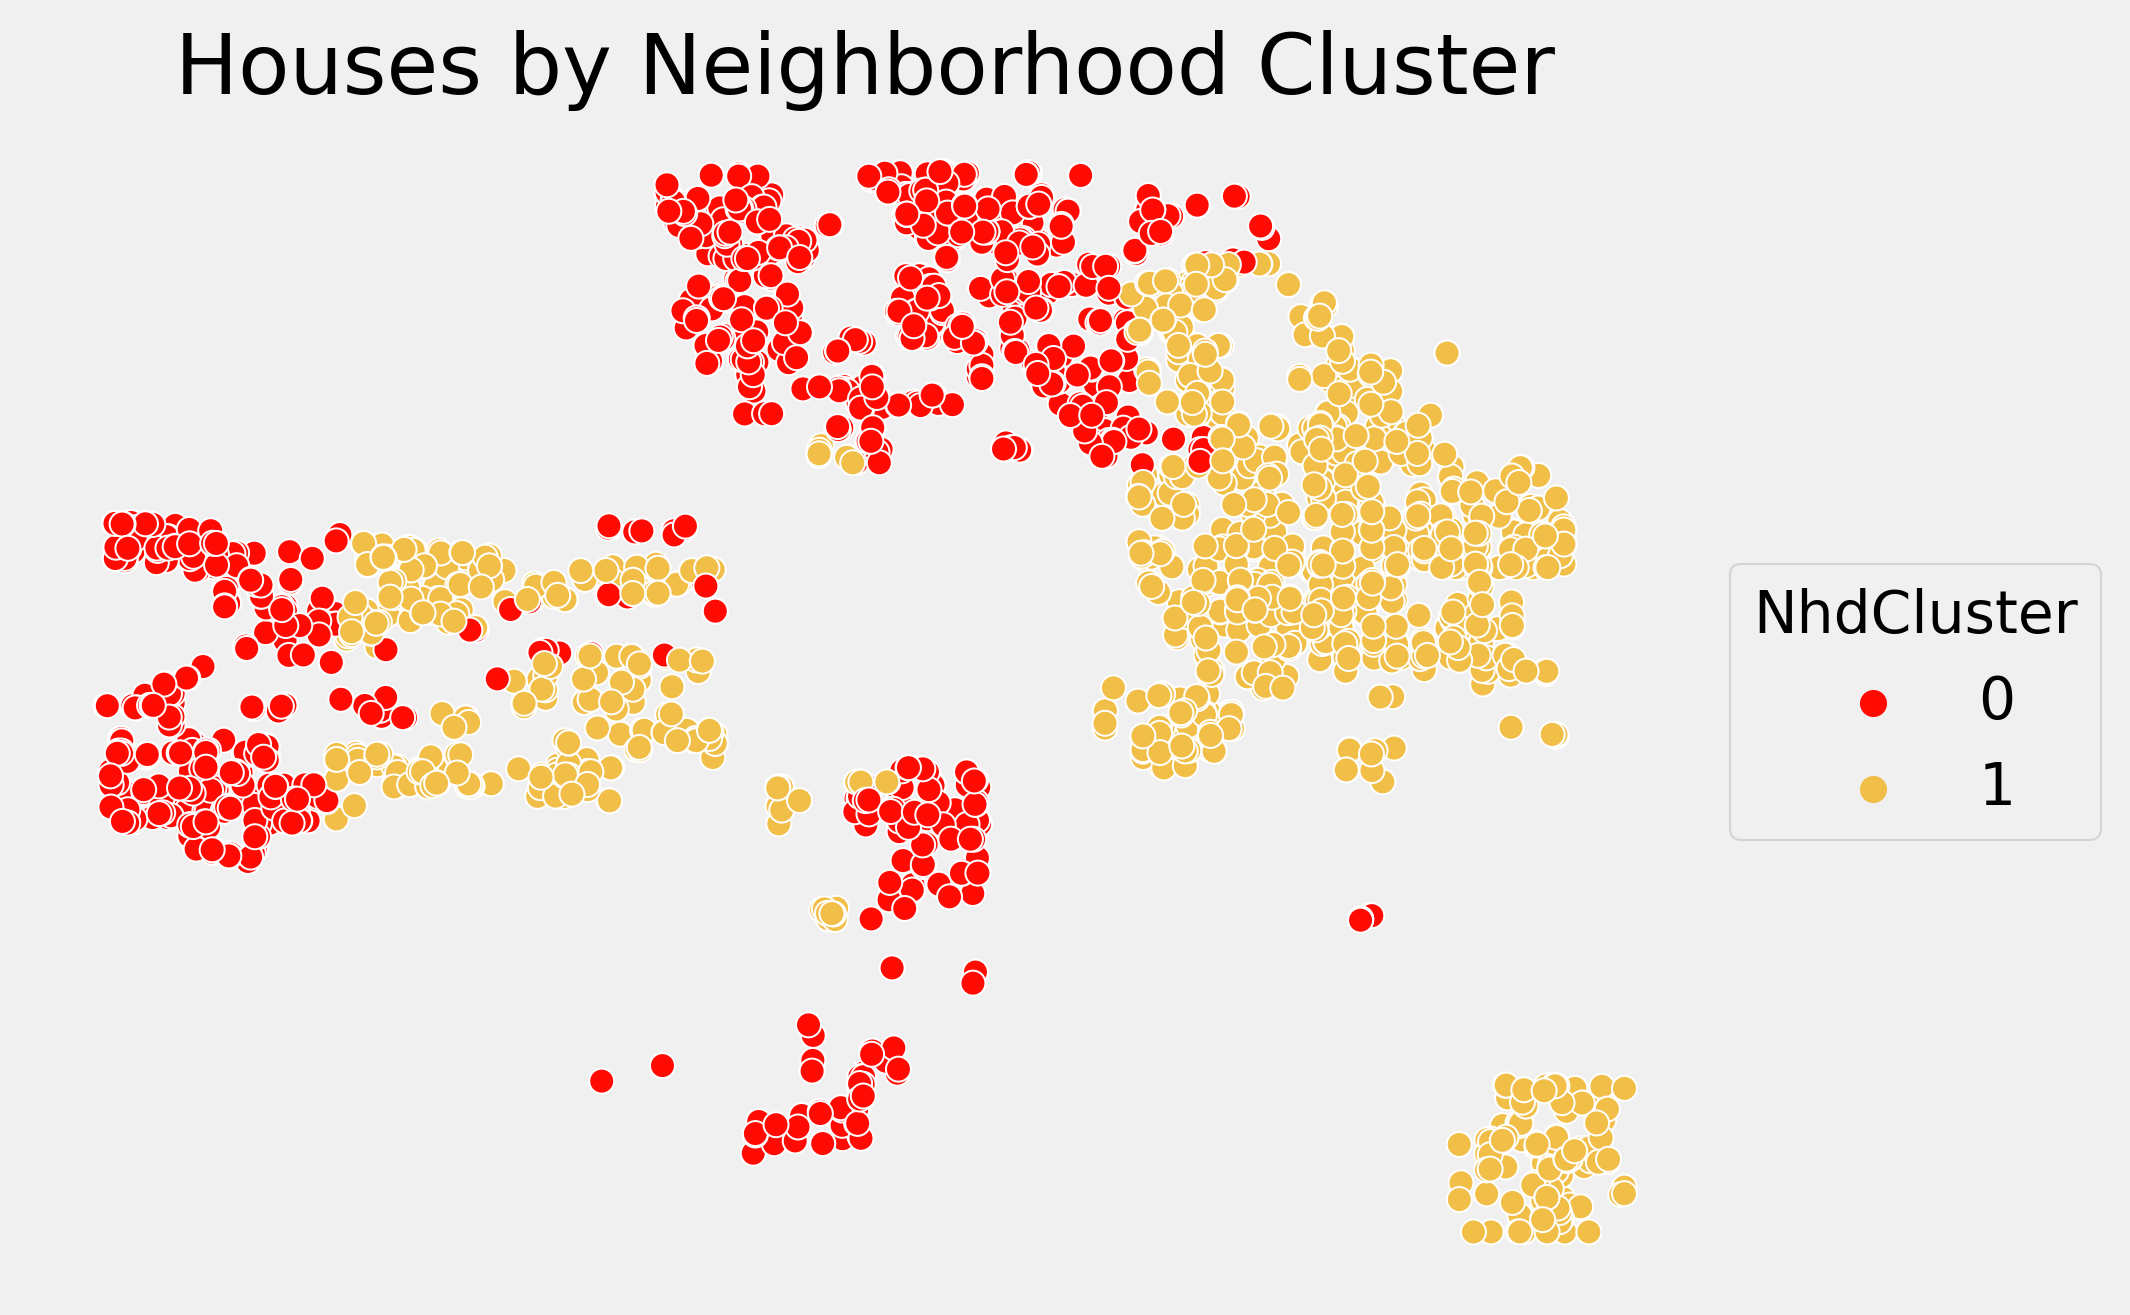

In [15]:
graph_df = loca
graph_df['SalePrice_bins'] = pd.qcut(graph_df['SalePrice'],
                              q=5)
graph_df.SalePrice_bins = graph_df.SalePrice_bins.astype(str)

g = sns.scatterplot(data = graph_df, y = 'latitude',x = 'longitude',
                    hue='NhdCluster',
#                     palette = colors,
                   )
plt.tick_params(axis="x", bottom=False, top=False, labelbottom=False, labeltop=False,labelsize=16)
plt.tick_params(axis="y", left=False, right=False, labelleft=False, labelright=False,labelsize=16)
g.set(xlabel='', ylabel='',title='Houses by Neighborhood Cluster')
g.grid(False)

sns.move_legend(g,loc = "center left",bbox_to_anchor=(1, .5),
#                 labels=labels, handles = handles, title = 'Binned Sale Price',
#                 frameon=False
               )

plt.show()